In [1]:
def gradient_descent(X, y, weights, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        # Вычисление предсказанных значений
        predictions = np.dot(X, weights)
        
        # Вычисление ошибки предсказания
        error = predictions - y
        
        # Вычисление градиента
        gradient = (1/m) * np.dot(X.T, error)
        
        # Обновление весов с учетом градиента
        weights -= learning_rate * gradient
        
        # Рассчитываем и сохраняем среднеквадратичную ошибку для мониторинга
        cost = np.sum((error ** 2)) / (2 * m)
        cost_history.append(cost)

    return weights, cost_history

# Задание 1

Какова вероятность отправиться на прогулку если идёт дождь, при наличии следующих наблюдений?

```
data = [
        ('солнечно', True),
        ('снег', False),
        ('облачно', False),
        ('дождь', False),
        ('солнечно', True),
        ('снег', False),
        ('облачно', True),
        ('снег', False),
        ('солнечно', False),
        ('облачно', True),
        ('снег', True),
        ('солнечно', True),
        ('дождь', False),
        ('дождь', True),
        ('облачно', True),
]
```

In [1]:
import pandas as pd
data = [
        ('солнечно', True),
        ('снег', False),
        ('облачно', False),
        ('дождь', False),
        ('солнечно', True),
        ('снег', False),
        ('облачно', True),
        ('снег', False),
        ('солнечно', False),
        ('облачно', True),
        ('снег', True),
        ('солнечно', True),
        ('дождь', False),
        ('дождь', True),
        ('облачно', True),
]

Преобразовываем список data в объект DataFrame:

In [2]:
dfr = pd.DataFrame(data, columns=['погода', 'прогулка'])

Отфильтровываем строки, чтобы оставить только наблюдения, где 'дождь'

In [3]:
df_rain = dfr[dfr['погода'] == 'дождь']

вычисляем вероятность

In [4]:
probability = df_rain['прогулка'].mean()
print(probability)

0.3333333333333333


## Задание 2
• Загрузите датасет для классификации (см. файл Excel для Лаб.работы №3), проведите предобработку, выделите целевой признак и предикторы, разбейте данные на обучающую и тестовую выборку.

• Масштабируйте числовые признаки.

• В случае дисбаланса проведите балансировку.

• Решите задачу классификации на ваших данных с использованием рас-смотренных моделей Sklearn: k-NN, Naive Bayes, Logistic Regression, SVM. Не забудьте подобрать гиперпараметры.

• Вычислите значения метрик Accuracy, Precision, Recall, F1, ROC AUC score.

• Построить итоговую модель классификаторов (см. Lab4_Ex5 ClassificationModel.ipynb).

## Задание 3
• Самостоятельно реализуйте метрики Accuracy, Precision, Recall, F1

• Самостоятельно реализуйте kNN.

## Дополнительные баллы
• Самостоятельно реализуйте SVM с возможностью выбирать ядро.

## Задание 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import os

In [3]:
os.chdir('../data')
#Вариант 1
df = pd.read_csv('airlines_task.csv')

# Проверка данных и их предобработка

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           400000 non-null  int64  
 1   Airline      399264 non-null  object 
 2   Flight       400000 non-null  int64  
 3   AirportFrom  400000 non-null  object 
 4   AirportTo    398843 non-null  object 
 5   DayOfWeek    399673 non-null  float64
 6   Time         400000 non-null  int64  
 7   Length       399517 non-null  float64
 8   Delay        400000 non-null  int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 27.5+ MB


In [5]:
df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,400740,XE,3036,IAH,CHS,4.0,1195,131.0,0
1,194808,UA,315,DEN,ONT,7.0,707,145.0,0
2,526903,OO,6673,SFO,MRY,5.0,499,42.0,1
3,477937,WN,3668,PHX,ONT,2.0,810,70.0,1
4,48180,AS,623,LAS,PDX,5.0,985,143.0,0


In [6]:
df = df.set_index('id')

In [7]:
cols = df.columns.tolist()
cols = [col.lower().replace(" ", "_") for col in cols]
df.columns = cols
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400000 entries, 400740 to 510933
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   airline      399264 non-null  object 
 1   flight       400000 non-null  int64  
 2   airportfrom  400000 non-null  object 
 3   airportto    398843 non-null  object 
 4   dayofweek    399673 non-null  float64
 5   time         400000 non-null  int64  
 6   length       399517 non-null  float64
 7   delay        400000 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 27.5+ MB


In [8]:
if df.isnull().any().any():
    for column in df.columns:
        if df[column].dtype == 'int64':
            # Заполним пропуски медианой для целых чисел
            df[column].fillna(df[column].median(), inplace=True)
        elif df[column].dtype == 'float64':
            # Заполним пропуски средним значением для действительных чисел
            df[column].fillna(df[column].mean(), inplace=True)
        else:
            # Заполним пропуски модой для остальных типов данных
            df[column].fillna(df[column].mode().iloc[0], inplace=True)
df.isna().sum()

airline        0
flight         0
airportfrom    0
airportto      0
dayofweek      0
time           0
length         0
delay          0
dtype: int64

In [9]:
df = df.drop_duplicates().reset_index(drop=True)
df.duplicated().sum()

0

In [10]:
for column in df.columns:
    if df[column].dtype == float:
        df[column] = df[column].astype(int)

df = pd.get_dummies(df)
df

,flight,dayofweek,time,length,delay,airline_9E,airline_AA,airline_AS,airline_B6,airline_CO,...,airportto_TXK,airportto_TYR,airportto_TYS,airportto_UTM,airportto_VLD,airportto_VPS,airportto_WRG,airportto_XNA,airportto_YAK,airportto_YUM
0,3036,4,1195,131,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,315,7,707,145,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,6673,5,499,42,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3668,2,810,70,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,623,5,985,143,0,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256653,2699,7,910,62,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
256654,3995,2,985,80,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
256655,6474,6,652,138,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
256656,486,7,365,107,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# EDA

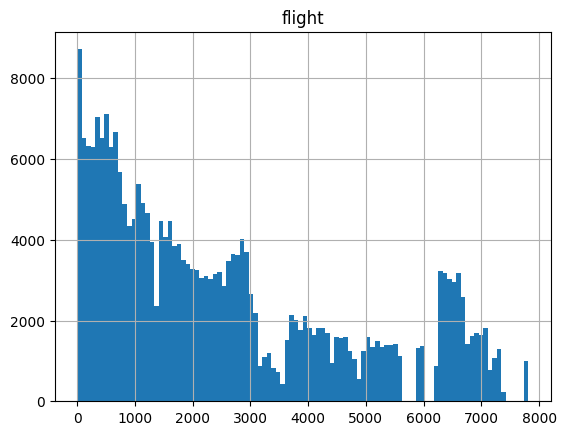

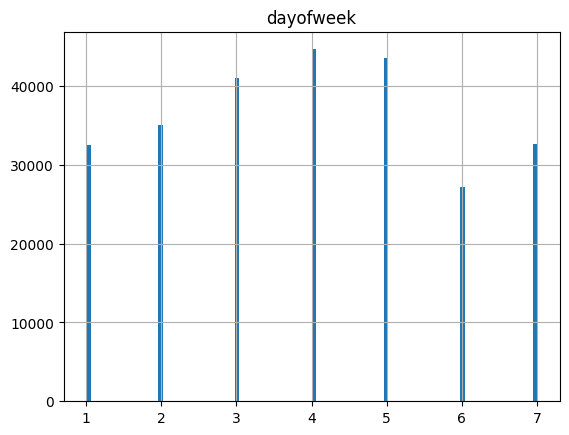

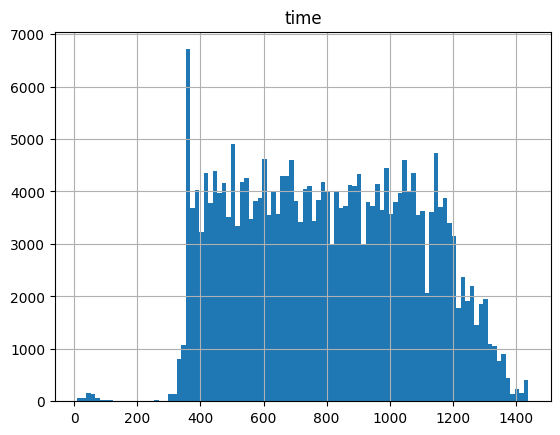

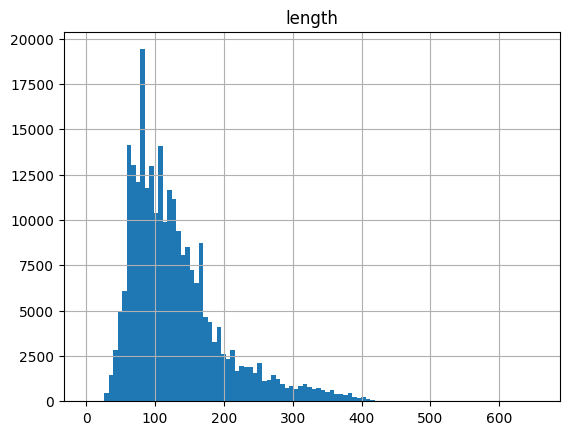

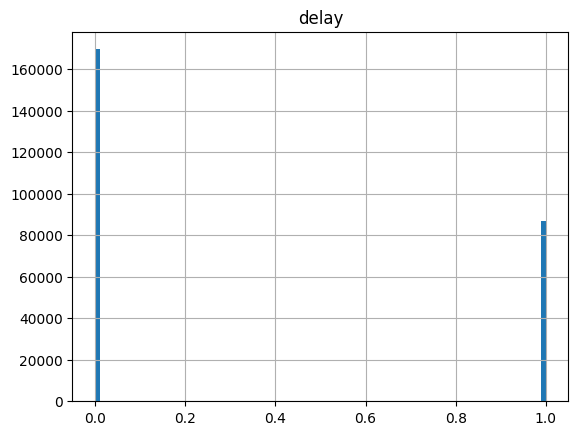

In [11]:
columns = ['flight','dayofweek','time','length', 'delay']

for col in columns:
    df.hist(col, bins=100)

In [12]:
df.describe()[['flight','dayofweek','time','length']]

,flight,dayofweek,time,length
count,256658.000000,256658.000000,256658.000000,256658.000000
mean,2547.516236,3.950140,803.438521,130.990630
std,2141.921078,1.893203,278.851653,68.827114
min,1.000000,1.000000,10.000000,0.000000
25%,739.000000,2.000000,565.000000,82.000000
50%,1921.000000,4.000000,796.000000,115.000000
75%,3977.000000,5.000000,1035.000000,160.000000
max,7813.000000,7.000000,1439.000000,655.000000


In [13]:
outlier = df[['flight','dayofweek','time','length']]
Q1 = outlier.quantile(0.25)
Q3 = outlier.quantile(0.75)
IQR = Q3-Q1
df_filtered = outlier[~((outlier < (Q1 - 1.5 * IQR)) |(outlier > (Q3 + 1.5 * IQR))).any(axis=1)]
index_list = list(df_filtered.index.values)
df_filtered = df[df.index.isin(index_list)]
df_filtered.head()

,flight,dayofweek,time,length,delay,airline_9E,airline_AA,airline_AS,airline_B6,airline_CO,...,airportto_TXK,airportto_TYR,airportto_TYS,airportto_UTM,airportto_VLD,airportto_VPS,airportto_WRG,airportto_XNA,airportto_YAK,airportto_YUM
0,3036,4,1195,131,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,315,7,707,145,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,6673,5,499,42,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3668,2,810,70,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,623,5,985,143,0,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


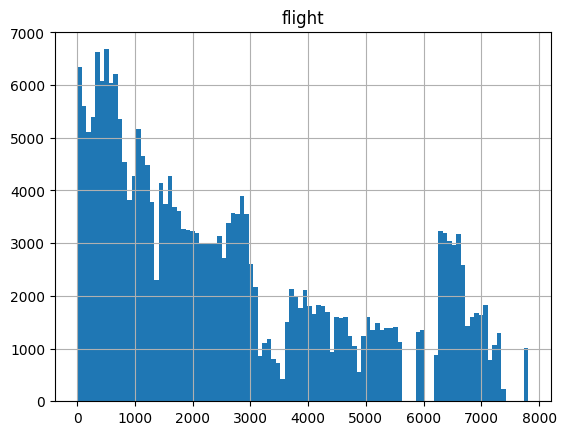

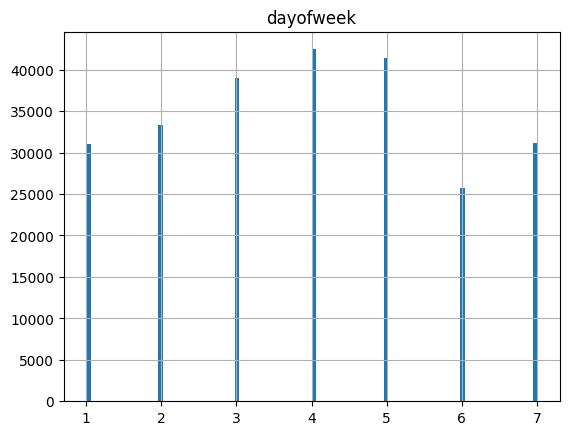

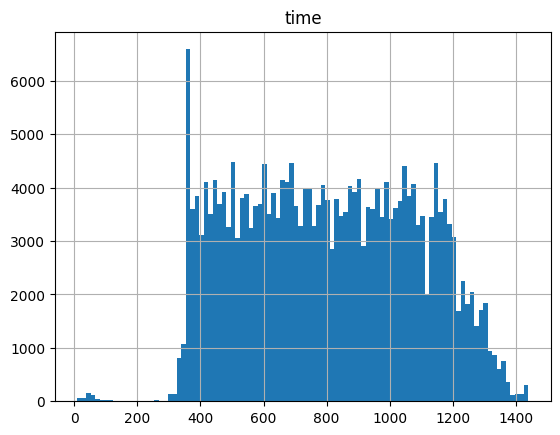

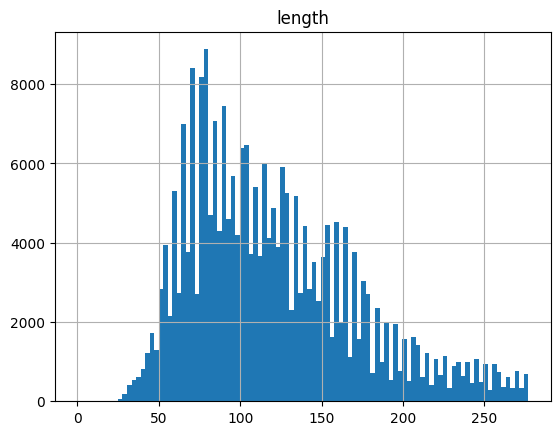

In [14]:
filtered_outlier = df_filtered[['flight','dayofweek','time','length']]

for col in filtered_outlier:
    df_filtered.hist(col, bins=100)

In [16]:
df_filtered.to_csv('../data/lab4.csv', index=False)

# Регрессия

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import numpy as np

## Масштабируйте числовые признаки.

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numeric_features = ['flight','dayofweek','time','length'] 
df[numeric_features] = scaler.fit_transform(df[numeric_features])

## В случае дисбаланса проведите балансировку.

In [20]:
y = df_filtered["delay"]
X = df_filtered.drop(["delay"], axis=1)

In [21]:
X, _, y, _ = train_test_split(X, y, test_size=0.1, random_state=42)
from imblearn.under_sampling import NearMiss
nm = NearMiss()
X, y = nm.fit_resample(X, y.ravel())

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Решите задачу классификации на ваших данных с использованием рас-смотренных моделей Sklearn: k-NN, Naive Bayes, Logistic Regression, SVM. Не забудьте подобрать гиперпараметры.

In [23]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [24]:
# Стандартизация признаков
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
# Определение параметров для RandomizedSearchCV
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']
param_dist = dict(n_neighbors=k_range, weights=weight_options)

### k-NN

In [26]:
knn = KNeighborsClassifier()
param_grid_knn = {'n_neighbors': [100, 1001, 300]}
grid_search_knn = GridSearchCV(knn, param_grid=param_grid_knn, cv=5)
grid_search_knn.fit(X_train, y_train)
best_knn = grid_search_knn.best_estimator_

### Naive Bayes

In [27]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

### Logistic Regression

In [28]:
lr = LogisticRegression()
penalty = ['l1', 'l2']
param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
lr_grid = GridSearchCV(lr, param_grid=param_grid_lr, cv=5)
lr_grid.fit(X_train, y_train)
lr = lr_grid.best_estimator_

### SVMd_vm)

In [29]:
#svm = SVC()
#svm.fit(X_train, y_train)

## Вычислите значения метрик Accuracy, Precision, Recall, F1, ROC AUC score.

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Оценка качества моделей
models = [lr, best_knn, nb]
for model in models:
    y_pred = model.predict(X_test)
    print(model.__class__.__name__)
    print('Accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred)))
    print('Precision: {:.3f}'.format(precision_score(y_test, y_pred)))
    print('Recall: {:.3f}'.format(recall_score(y_test, y_pred)))
    print('F1-score: {:.3f}'.format(f1_score(y_test, y_pred)))
    print('ROC-AUC: {:.3f}'.format(roc_auc_score(y_test, y_pred)))
    print()

LogisticRegression
Accuracy: 0.605
Precision: 0.646
Recall: 0.456
F1-score: 0.535
ROC-AUC: 0.604

KNeighborsClassifier
Accuracy: 0.579
Precision: 0.588
Recall: 0.517
F1-score: 0.550
ROC-AUC: 0.579

GaussianNB
Accuracy: 0.512
Precision: 0.609
Recall: 0.058
F1-score: 0.106
ROC-AUC: 0.511



## Построить итоговую модель классификаторов

In [35]:
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report, precision_recall_curve
classifiers = {
    'Logistic Regression': lr,
    'KNN classifier': best_knn,
    'Naive Bayes': nb}
n_classifiers = len(classifiers)

for index, (name, classifier) in enumerate(classifiers.items()):

    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy (train) for %s: %0.1f%% " % (name, accuracy * 100))
    print(classification_report(y_test,y_pred))

Accuracy (train) for Logistic Regression: 60.5% 
              precision    recall  f1-score   support

           0       0.58      0.75      0.66     22362
           1       0.65      0.46      0.53     22193

    accuracy                           0.60     44555
   macro avg       0.61      0.60      0.60     44555
weighted avg       0.61      0.60      0.60     44555

Accuracy (train) for KNN classifier: 57.9% 
              precision    recall  f1-score   support

           0       0.57      0.64      0.60     22362
           1       0.59      0.52      0.55     22193

    accuracy                           0.58     44555
   macro avg       0.58      0.58      0.58     44555
weighted avg       0.58      0.58      0.58     44555

Accuracy (train) for Naive Bayes: 51.2% 
              precision    recall  f1-score   support

           0       0.51      0.96      0.66     22362
           1       0.61      0.06      0.11     22193

    accuracy                           0.51     

## Задание 3

## Самостоятельно реализуйте метрики Accuracy, Precision, Recall, F1

In [36]:
from sklearn.metrics import confusion_matrix

def accuracy(y_true, y_pred):
    correct = sum(y_t == y_p for y_t, y_p in zip(y_true, y_pred))
    return correct / len(y_true)

def precision(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    return cm[1, 1] / (cm[1, 1] + cm[0, 1])

def recall(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    return cm[1, 1] / (cm[1, 1] + cm[1, 0])

def f1(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * p * r / (p + r)

In [41]:
for model in models:
    y_pred = model.predict(X_test)
    print(model.__class__.__name__)
    print('Accuracy: {:.3f}'.format(accuracy(y_test, y_pred)))
    print('Precision: {:.3f}'.format(precision(y_test, y_pred)))
    print('Recall: {:.3f}'.format(recall(y_test, y_pred)))
    print('F1: {:.3f}'.format(f1(y_test, y_pred)))

LogisticRegression
Accuracy: 0.605
Precision: 0.646
Recall: 0.456
F1: 0.535
KNeighborsClassifier
Accuracy: 0.579
Precision: 0.588
Recall: 0.517
F1: 0.550
GaussianNB
Accuracy: 0.512
Precision: 0.609
Recall: 0.058
F1: 0.106


## Самостоятельно реализуйте kNN.

In [38]:
from collections import Counter
from scipy.spatial import distance

class CustomKNN(object):
    def __init__(self, k=1):
        self.k = k

    def fit(self, X, y):
        self.database_X = X.copy()
        self.database_y = y.copy()

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

    def _predict(self, x):
        # считаем расстояний между x и примерами
        distances = [distance.euclidean(x, x_train) for x_train in self.database_X]

        # получаем индексы соседей
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.database_y[i] for i in k_indices]

        # считаем голоса предсказания
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

## Самостоятельно реализуйте SVM с возможностью выбирать ядро.

In [39]:
import numpy as np
from cvxopt import matrix, solvers
from sklearn.metrics.pairwise import rbf_kernel, polynomial_kernel, linear_kernel

class SVM:
    def __init__(self, kernel='linear', C=1.0, gamma=1.0, degree=3):
        self.kernel = kernel
        self.C = C
        self.gamma = gamma
        self.degree = degree
        self.alpha = None
        self.support_vectors = None
        self.support_labels = None
        self.intercept = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # считаем матрицу ядра
        if self.kernel == 'linear':
            K = linear_kernel(X, X)
        elif self.kernel == 'polynomial':
            K = polynomial_kernel(X, X, degree=self.degree, gamma=self.gamma)
        elif self.kernel == 'rbf':
            K = rbf_kernel(X, X, gamma=self.gamma)
        else:
            raise ValueError('Invalid kernel type.')
        # выбираем метрики 
        y = np.where(y <= 0, -1, 1)

        # ставим задачу оптимизации
        P = matrix(np.outer(y, y) * K)
        q = matrix(-np.ones(n_samples))
        G = matrix(np.vstack((-np.eye(n_samples), np.eye(n_samples))))
        h = matrix(np.concatenate((np.zeros(n_samples), self.C * np.ones(n_samples))))
        A = matrix(y.reshape(1, -1))
        b = matrix(np.zeros(1))

        # считаем квадратичную оптимизацию
        solvers.options['show_progress'] = False
        solution = solvers.qp(P, q, G, h, A, b)

        # считаем множетели лагранжа
        self.alpha = np.ravel(solution['x'])

        # получаем опорные вектора и их метки
        sv_indices = np.where(self.alpha > 1e-5)[0]
        self.support_vectors = X[sv_indices]
        self.support_labels = y[sv_indices]

        # считаем охваты для ядер
        if self.kernel == 'linear':
            self.intercept = np.mean(self.support_labels - np.dot(self.support_vectors, X.T))
        elif self.kernel == 'polynomial':
            self.intercept = np.mean(self.support_labels - np.sum((self.alpha * self.support_labels) *
                                                                  polynomial_kernel(self.support_vectors,
                                                                                    self.support_vectors,
                                                                                    degree=self.degree,
                                                                                    gamma=self.gamma), axis=0))
        elif self.kernel == 'rbf':
            self.intercept = np.mean(self.support_labels - np.sum((self.alpha * self.support_labels) *
                                                                  rbf_kernel(self.support_vectors,
                                                                             self.support_vectors,
                                                                             gamma=self.gamma), axis=0))
    # предсказываем на основе ядра
    def predict(self, X):
        if self.kernel == 'linear':
            return np.sign(np.dot(X, self.support_vectors.T) + self.intercept)
        elif self.kernel == 'polynomial':
            kernel_vals = polynomial_kernel(X, self.support_vectors, degree=self.degree, gamma=self.gamma)
            return np.sign(np.dot(kernel_vals, (self.alpha * self.support_labels)) + self.intercept)
        elif self.kernel == 'rbf':
            kernel_vals = rbf_kernel(X, self.support_vectors, gamma=self.gamma)
            return np.sign(np.dot(kernel_vals, (self.alpha * self.support_labels)) + self.intercept)

In [44]:
svm = SVM(kernel='linear', gamma=0.5)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

# Оценка точности
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

MemoryError: Unable to allocate 80.5 GiB for an array with shape (103959, 103959) and data type float64